<a href="https://colab.research.google.com/github/valmazan/Project_Part_Prediction-of-Product-Sales/blob/main/Project_1_Pred_Product_Sales_Victoria_Almazan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

Victoria Almazan

# Project Part 1 & 2

## Parts 1

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!



---



# Part 2

We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

* Download the data using this link: download the data. (Note: Original data source).
* Insert code below the heading "Loading Data"
 * Use Pandas to read the sales prediction data set into Google Colab.
 * Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
* Insert code below the heading "Data Cleaning"
* Explore the data - what do you need to do to clean this data? Clean it!

Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

# Imports

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Inspect Data

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQujSPVdp1EfFsngrLgWZZ_VT_I7nuzXs10BqUJV5ai8hFZoUDf3mpA68wj37UFVfS3yvj_QvvO6655/pub?gid=1913766112&single=true&output=csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Clean Data 


#####   1) How many rows and columns?
 







In [ ]:
df.shape

(8523, 12)

* There are 8523 rows and 12 columns

##### 2)Checking DataTypes 

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Duplicated Data

##### 3) Are there duplicates? if so, drop any duplicates.

In [ ]:
df.duplicated().sum()

0

* There are 0 duplicates for this dataset.




##### 4) Identify missing values.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


   * There are `1463` missing values in the `Item_Weight` column.
   * There are `2410` missing values in the `Outlet_Size` column. 







In [ ]:
df[df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


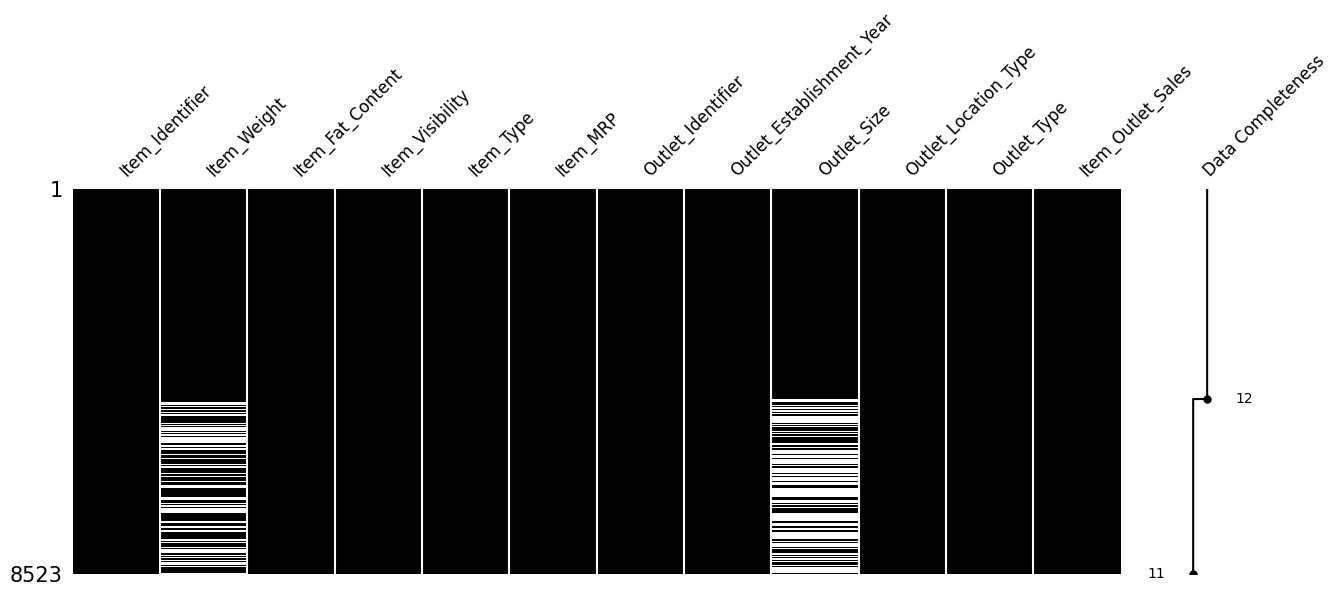

In [ ]:
msno.matrix(df, figsize=(15,5), labels=True, 
            fontsize=12, sort="descending", color=(0,0,0));

# Missing Values

#####5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

 * To address the missing value for `'Item_Weight'` we will Impute missing values using the 'median' value of the column. This way we would not have to drop any columns as it is less than 50% missing values.

In [ ]:
median_weight = df['Item_Weight'].median()

In [ ]:
df['Item_Weight'].fillna(value = median_weight, inplace = True)

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Additionally, for the missing data for `'Outlet_Size'` since the missing datatset is less than 50%, we will replace the missing values with `'Unknown'`.

In [ ]:
df['Outlet_Size']= df['Outlet_Size'].fillna(value = 'Unknown')

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#####6) Confirm that there are no missing values after addressing them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Inconsistent Categories

#####7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
data_types = df.dtypes
object_data_types = data_types[(data_types == "object")]
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [ ]:
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for column in object_data_types.index:
    
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [ ]:
df.replace({'reg': 'Regular', 'low fat': 'Low Fat', 'LF': 'Low Fat'}, inplace = True)

In [ ]:
for column in object_data_types.index:
    
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




8) For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [ ]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [ ]:
num_value = df.describe()
num_value.loc[['mean', 'min','max']].round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81,0.07,140.99,1997.83,2181.29
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96


# Part 3 - Exploratory Data

##For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

*  Histogram to view the distributions of various features in your dataset.
*  Boxplot to view statistical summaries of various features in your dataset.
*  Heatmap of the correlation between features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
num = df.select_dtypes('number').columns
num

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

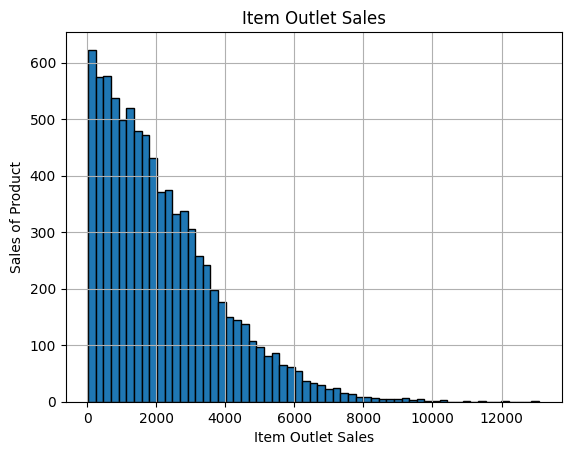

In [ ]:
ax = df['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor='black')
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Item Outlet Sales')
ax.set_ylabel('Sales of Product');

In [ ]:
df['Item_Outlet_Sales'].describe().round()

count     8523.0
mean      2181.0
std       1706.0
min         33.0
25%        834.0
50%       1794.0
75%       3101.0
max      13087.0
Name: Item_Outlet_Sales, dtype: float64

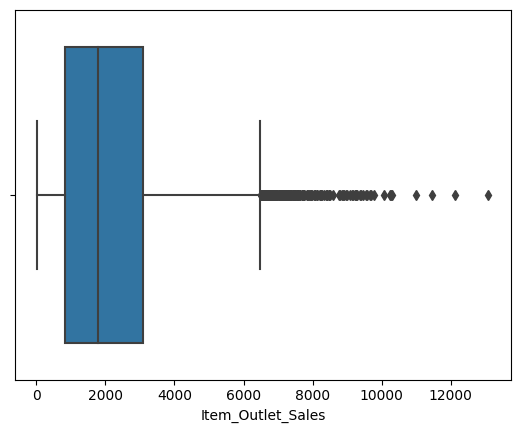

In [ ]:
ax = sns.boxplot(data = df, x = 'Item_Outlet_Sales')

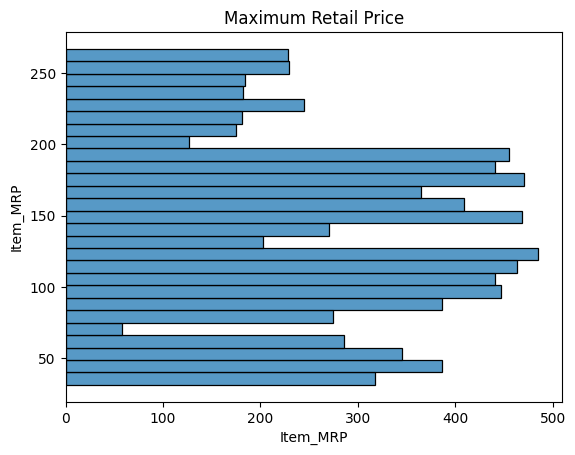

In [ ]:
ax = sns.histplot(data=df, y = 'Item_MRP')
ax.set_title('Maximum Retail Price')
ax.set_xlabel('Item_MRP');

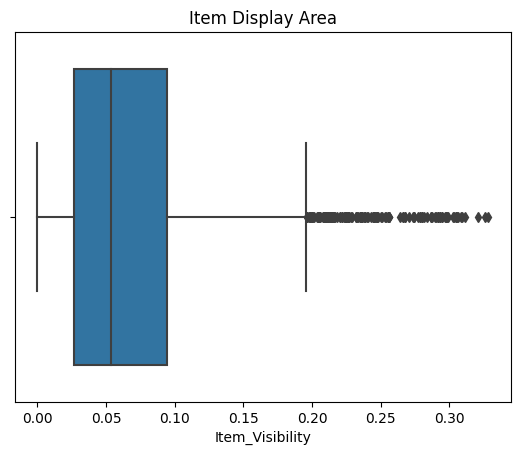

In [ ]:
ax = sns.boxplot( x = 'Item_Visibility',data = df)
ax.set_title('Item Display Area');

In [ ]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

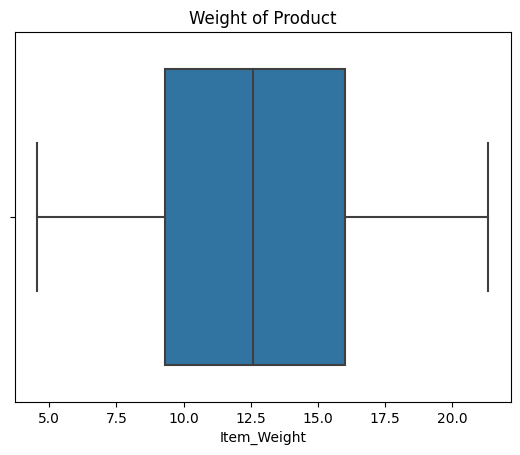

In [ ]:
ax = sns.boxplot(x = 'Item_Weight',data=df)
ax.set_title('Weight of Product');

* Average weight based on item 

In [ ]:
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

##Correlation!

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['Item_Outlet_Sales'].corr(df['Item_MRP']).round()

1.0

In [ ]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


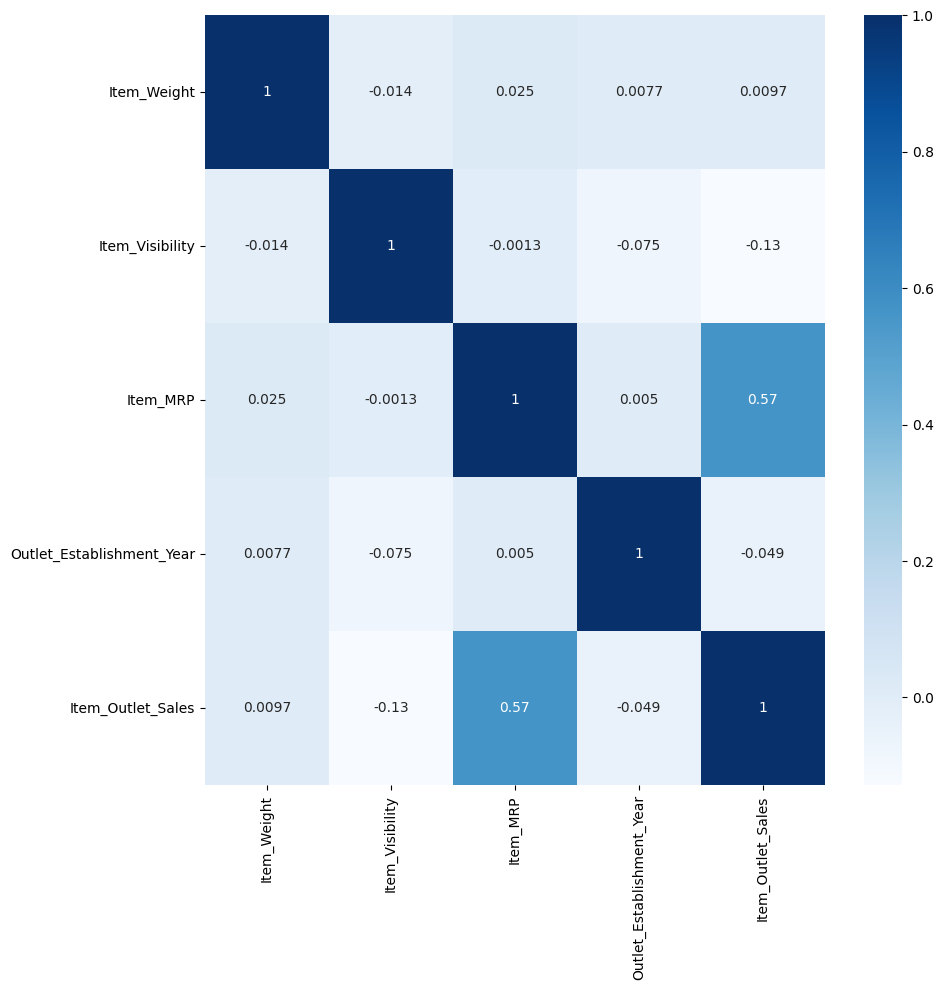

In [ ]:

fig, ax = plt.subplots(figsize = (10,10))

ax = sns.heatmap(corr,cmap = 'Blues',annot = True)


* Based on our heat map above, we can see dont really see a slight correlation between Item_MRP and Item_Outlet_Sales.
* Additionally we do not see a strong correlation shown.

# Visualing with  Barplots

Below are a few visualized barplots with the categorical counts of the 'object' types.

*  I have excluded columns that are idenifying labels such as `Item_Identifier` & `Outlet_Identifier`. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


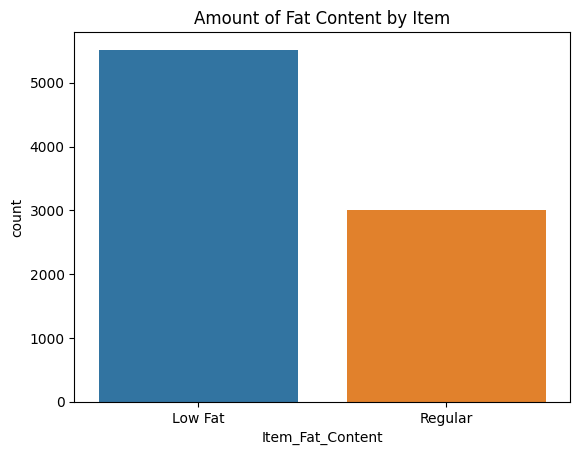

In [ ]:
ax = sns.countplot(data=df,x='Item_Fat_Content')
ax.set_title('Amount of Fat Content by Item');

*  Here we can identify the items that differ by `Fat Content`. Most items are `Low Fat`.

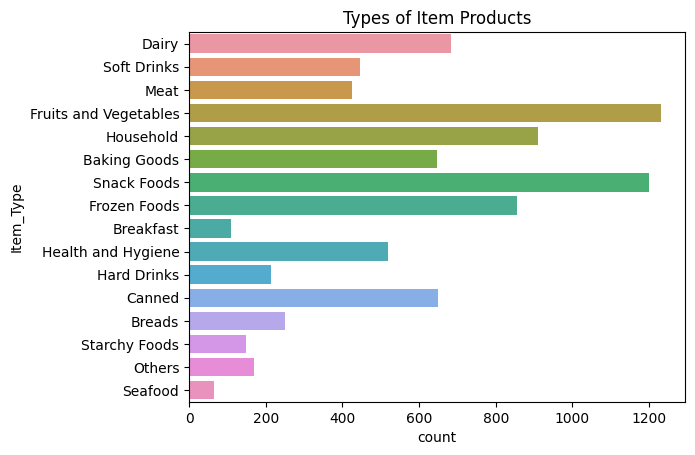

In [ ]:
ax = sns.countplot(data=df, y='Item_Type')
ax.set_title('Types of Item Products');

*  From this graph, we can see that `Fruits and Vegetables` and `Snack Foods` are the outliers as the highest count type.

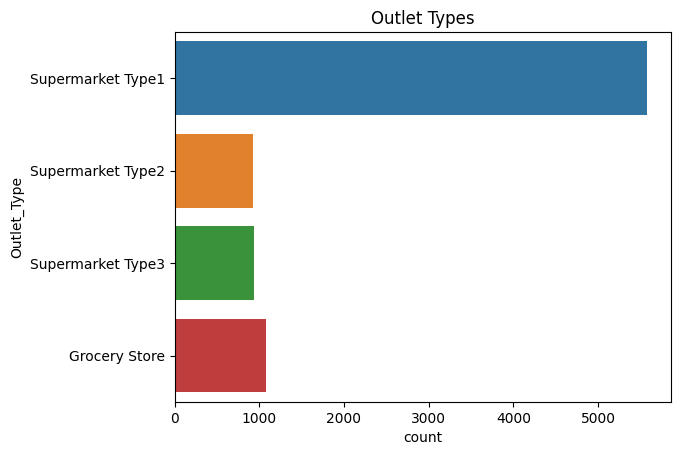

In [ ]:
ax = sns.countplot(data=df,y='Outlet_Type',order = ['Supermarket Type1','Supermarket Type2','Supermarket Type3','Grocery Store'])
ax.set_title('Outlet Types');

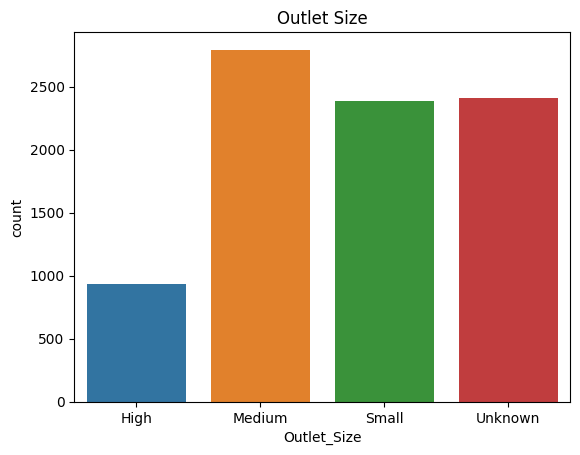

In [ ]:
ax = sns.countplot(data=df,x='Outlet_Size', order= ['High','Medium','Small','Unknown'])
ax.set_title('Outlet Size');

*  From this bargraph we can see the size of store based by size.

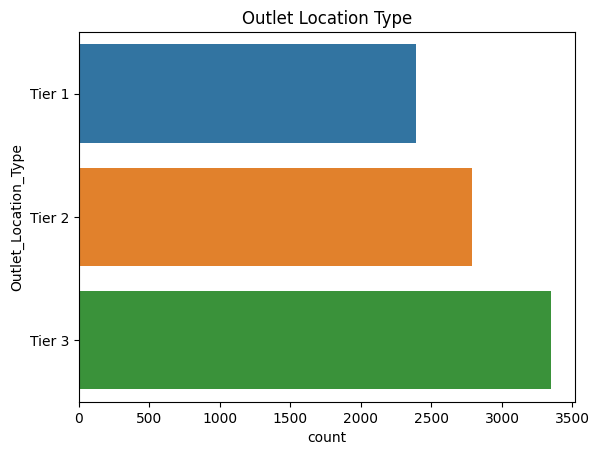

In [ ]:
ax = sns.countplot(data=df, y='Outlet_Location_Type', order = ['Tier 1','Tier 2','Tier 3'])
ax.set_title('Outlet Location Type');

# Part 4 - Explanatory Data

Explanatory Visuals & Analysis

For Part 4, our task is to build several data visualizations to help stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

- We will build on our previous cleaning, exploration, and analysis.
- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

Exploring Questions

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

1. What is the percentage of the display area of all products in a store based on the type of item? 


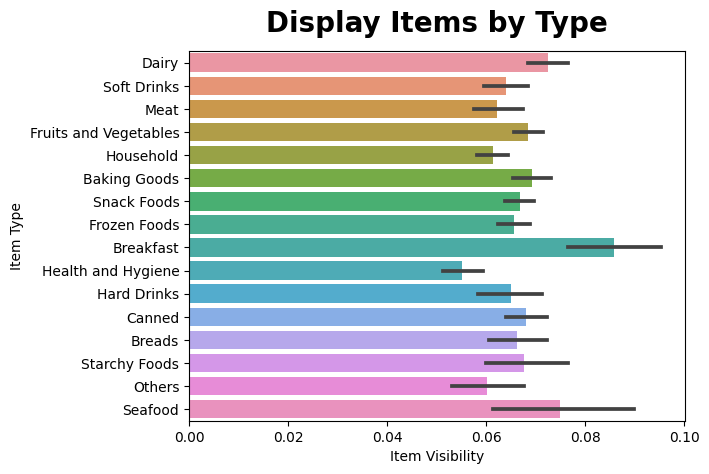

In [ ]:
ax = sns.barplot(data= df, y = 'Item_Type', x= 'Item_Visibility');
ax.set_ylabel('Item Type')
ax.set_xlabel('Item Visibility')
ax.set_title('Display Items by Type', fontsize= 20, fontweight= 'bold', y = 1.03);

Does Item Weight affect the Item sales?

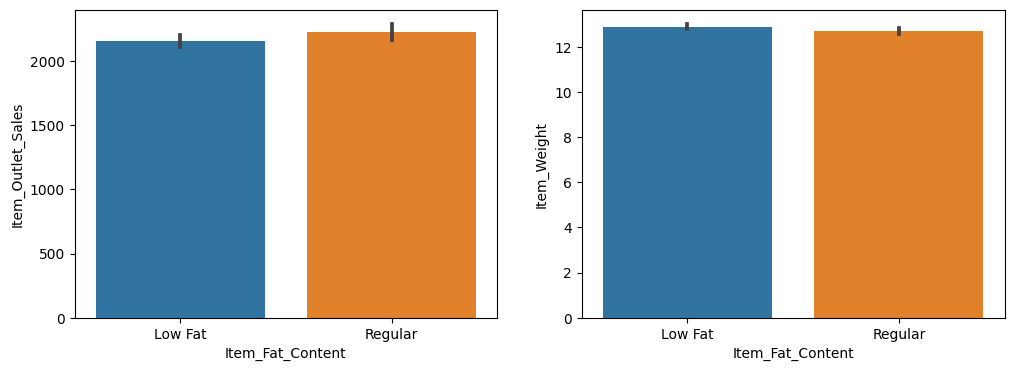

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))

ax = sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales',ax = axes[0])

sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_Weight' , ax = axes[1]);



What is the overall average of sales based on items?

In [ ]:
means = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).round(2)
means

Item_Type
Starchy Foods            2374.33
Seafood                  2326.07
Fruits and Vegetables    2289.01
Snack Foods              2277.32
Household                2258.78
Dairy                    2232.54
Canned                   2225.19
Breads                   2204.13
Meat                     2158.98
Hard Drinks              2139.22
Frozen Foods             2132.87
Breakfast                2111.81
Health and Hygiene       2010.00
Soft Drinks              2006.51
Baking Goods             1952.97
Others                   1926.14
Name: Item_Outlet_Sales, dtype: float64

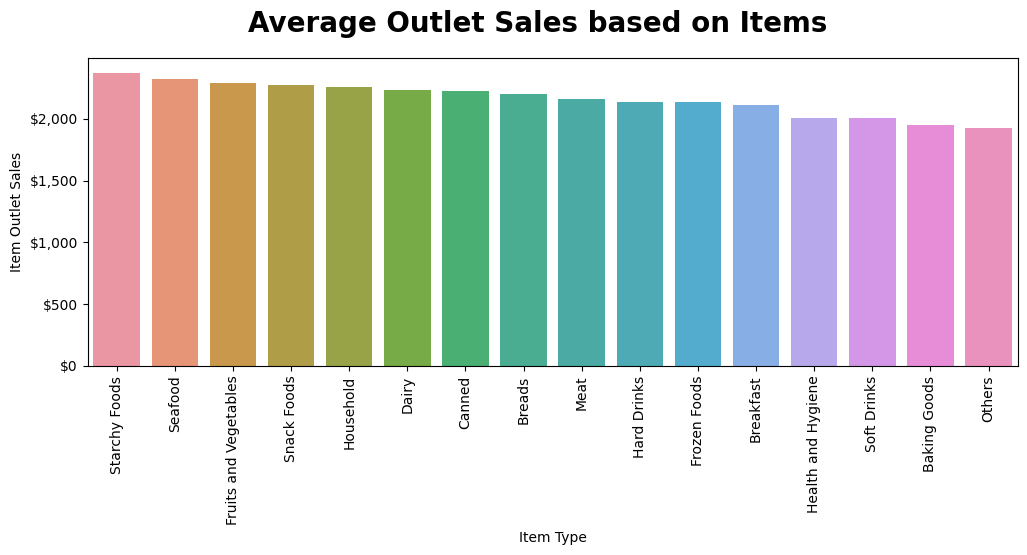

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 90);

def hundred(x,pos):
  return f'${x*1e-0:,.0f}'

price_100 = FuncFormatter(hundred)

ax.yaxis.set_major_formatter(price_100)
ax.set_ylabel('Item Outlet Sales')
ax.set_xlabel('Item Type')

fig.suptitle('Average Outlet Sales based on Items', fontsize = 20, fontweight = 'bold', y = 1.00);

How have sales & maximum retail price been impacted through the years based on outlet establishment? 

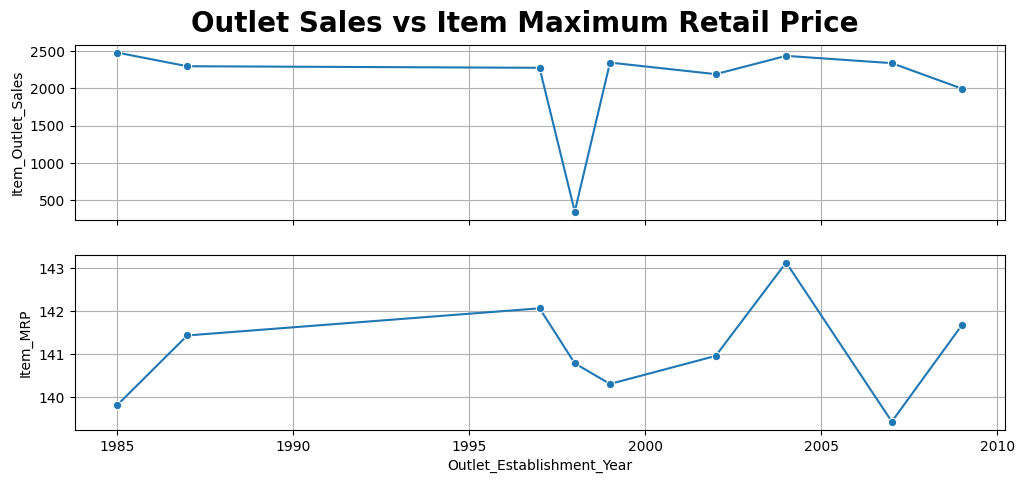

In [ ]:
fig, axes = plt.subplots(nrows = 2, figsize = (12,5), sharex = True)

sns.lineplot(data = df, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', errorbar = None, marker = 'o', ax = axes[0])
sns.lineplot(data = df, x = 'Outlet_Establishment_Year', y = 'Item_MRP', errorbar = None, marker = 'o', ax = axes[1]);


[ax.grid()for ax in axes];

plt.suptitle('Outlet Sales vs Item Maximum Retail Price', fontsize = 20, fontweight = 'bold', y = .95);



---



# Project 1 - Part 5 

## Processing for Machine Learning 

### For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
- Perform a train test split
- Create a preprocessing object to prepare the dataset for Machine Learning
- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

## Reloading the Data

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTcCJKE33Y9DPFAv4zzLd9zRhi8bvs_jfCsy6QB614gfuc4zDluoQChypxwPqm6kkUc-lhMO_L8S_NE/pub?gid=1358293423&single=true&output=csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
df['Item_Weight'].isna().sum()

1463

In [ ]:
df.dropna(subset=['Item_Weight'], inplace=True)

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    4222
Regular    2388
LF          260
reg         106
low fat      84
Name: Item_Fat_Content, dtype: int64

In [ ]:
item_fat= {'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(item_fat)
df['Item_Fat_Content'].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


In [ ]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical columns are ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
scaler = StandardScaler()

In [ ]:
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [ ]:
scaler.fit_transform(X_train[num_selector(X_train)])

array([[-0.70374178, -1.08812742,  0.41883957, -0.38931493],
       [-1.54422421,  0.03649532,  1.89057125,  1.2854006 ],
       [ 1.68533759,  0.58713889, -1.03531088, -2.06403046],
       ...,
       [ 1.53467493, -1.31885729, -1.56458456,  1.2854006 ],
       [ 0.02804829,  0.39844527,  0.88332868, -2.06403046],
       [-0.29480027, -1.01129403,  0.49736088,  0.98090686]])

In [ ]:
preprocessor = make_column_transformer((cat_pipe,cat_selector),
                                       (scaler,num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f976565b9a0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f97657439a0>)])

In [ ]:
preprocessor.fit_transform(X_train)

array([[ 0.        ,  0.        ,  0.        , ..., -1.08812742,
         0.41883957, -0.38931493],
       [ 0.        ,  0.        ,  0.        , ...,  0.03649532,
         1.89057125,  1.2854006 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.58713889,
        -1.03531088, -2.06403046],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.31885729,
        -1.56458456,  1.2854006 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.39844527,
         0.88332868, -2.06403046],
       [ 0.        ,  0.        ,  0.        , ..., -1.01129403,
         0.49736088,  0.98090686]])

In [ ]:
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f976565b9a0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f97657439a0>)])),
                ('linearregression', LinearRegression())])



---



In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from sklearn import set_config

set_config(display='diagram')

In [ ]:
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f976565b9a0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f97657439a0>)])

# Final 

This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

Tips:
It is recommended to drop the 'Item_Identifier' column due to high cardinality, (1559 is a high number of unique labels or classes). High cardinality will create a very sparse dataset when it is One Hot Encoded, which can negatively impact the models' metrics, and greatly increase processing times.



In [ ]:
df = df.drop(columns = ['Item_Identifier'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. Your first task is to build a linear regression model to predict sales.
  - Build a linear regression model.
  - Evaluate the performance of your model based on r^2.
  - Evaluate the performance of your model based on rmse.

In [ ]:
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, split='training'):
  
  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  
  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [ ]:
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.646
  - MAE = 667.187
  - MSE = 821542.903
  - RMSE = 906.39

Results for testing data:
  - R^2 = -2.206139899887495e+21
  - MAE = 8327667832409.018
  - MSE = 5.382883329193507e+27
  - RMSE = 73368135652976.12



Linear Regression Model Observations
- The model performs decently on the training set, but preforms poorly on the training test.

2. Your second task is to build a regression tree model to predict sales.

  - Build a simple regression tree model.
  - Compare the performance of your model based on r^2.
  - Compare the performance of your model based on rmse.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state = 42))
dec_tree_pipe.fit(X_train, y_train)

y_hat_train = dec_tree_pipe.predict(X_train)
y_hat_test = dec_tree_pipe.predict(X_test)

In [ ]:
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 1.0
  - MAE = 0.0
  - MSE = 0.0
  - RMSE = 0.0

Results for testing data:
  - R^2 = 0.096
  - MAE = 1065.951
  - MSE = 2205576.275
  - RMSE = 1485.118



Untuned Decision Tree Model Observations 
- This model performs well in the testing model, but performs poorly on the training set. 
- This is overfit and will need tuning. 

In [ ]:
depths = range(1, dec_tree_pipe['decisiontreeregressor'].get_depth())


scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)


for n in depths:
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  tree_pipe = make_pipeline(preprocessor, tree)
  
  tree_pipe.fit(X_train, y_train)
  
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [ ]:
scores

,Train,Test
1,0.279663,0.283979
2,0.422568,0.440009
3,0.494265,0.519128
4,0.515497,0.530843
5,0.524757,0.533627
6,0.53588,0.524165
7,0.548025,0.517847
8,0.564594,0.510716
9,0.58089,0.486037
10,0.597373,0.472222


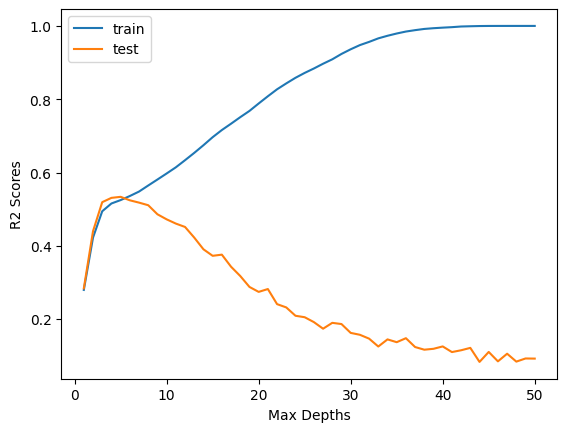

In [ ]:
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [ ]:
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

In [ ]:
best_tree = DecisionTreeRegressor(random_state = 42, max_depth=best_depth)

best_tree_pipe = make_pipeline(preprocessor, best_tree)

best_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_tree_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_tree_pipe.predict(X_test), split = 'testing')

Training Scores for High Variance Decision Tree
Results for training data:
  - R^2 = 0.525
  - MAE = 752.746
  - MSE = 1103073.45
  - RMSE = 1050.273



Testing Scores for High Variance Decision Tree
Results for testing data:
  - R^2 = 0.534
  - MAE = 754.496
  - MSE = 1137929.685
  - RMSE = 1066.738



Tuned (Max Depth) Decision Tree Model 
- This model performed very well in the Test data. 
- R^2  is scoring at 53%


Importing Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
rf_tree_pipe.fit(X_train, y_train)


y_hat_train = rf_tree_pipe.predict(X_train)
y_hat_test = rf_tree_pipe.predict(X_test)

In [ ]:
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.924
  - MAE = 298.523
  - MSE = 176844.473
  - RMSE = 420.529

Results for testing data:
  - R^2 = 0.493
  - MAE = 788.057
  - MSE = 1237667.664
  - RMSE = 1112.505



Untuned Random Forest Model Observation 
- For this model we see a large variance of bias in comparison to the other models. There is improved performance on testing set. 
- R^2 is showing 49% 
- MAE is reporting testing data is off by $489.53.

### Overall Recommendation 

- My recommendation is Tuned (Max Depth) Decision Tree Model 
  - For this testing set on the model, 53% of the variance was explained. 
 - The Mean Absolute Error was off by $7,544.96.

 - The Mean Squared Error was $1,137,929.68.
 
 - The Root Mean Squared Error had a calculation of $1,066.79

Using this model to make predictions about the how features of products and visiubilty affect the purchase based on 

4. To finalize this project, complete a README in your GitHub repository including:

  - An overview of the project
  - 2 relevant insights from the data (supported with reporting quality visualizations)
  - Summary of the model and its evaluation metrics
  - Final recommendations 


5.  Remove all references to "Project 1" in your filenames, repository name, final readme, and/or notebook. You want this to be read as a professional presentation, not a school project. If you need, create a clean, new repository that only contains your final notebook, README (project summary/explanation), and the images/visualizations you're using.  Ask yourself, what would this look like if this were a project you completed for a real-life stakeholder?